In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import prince
import factor_analyzer

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer
from sklearn.decomposition import PCA

from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [2]:
data = pd.read_csv("twitter-featured.csv")
data = data.drop('Unnamed: 0', axis=1)
data.head()

,Winner,T1_TwitterVol,T2_TwitterVol,T1_FansSent,T2_FansSent,T1_FansPred,T2_FansPred
0,0,0.571429,0.428571,0.571429,0.380952,0.000000,0.000000
1,0,0.837838,0.162162,0.648649,0.162162,0.000000,0.000000
2,1,0.356688,0.643312,0.299363,0.535032,0.333333,0.666667
3,0,0.464286,0.535714,0.464286,0.464286,0.000000,0.000000
4,1,0.695652,0.304348,0.565217,0.282609,0.000000,0.000000


In [3]:
# train test split
train, test= train_test_split(data, test_size = 0.2, random_state = 100)

In [4]:
train.shape, test.shape

((415, 7), (104, 7))

In [5]:
train.columns

Index(['Winner', 'T1_TwitterVol', 'T2_TwitterVol', 'T1_FansSent',
       'T2_FansSent', 'T1_FansPred', 'T2_FansPred'],
      dtype='object')

In [6]:
train.isnull().sum()

Winner           0
T1_TwitterVol    0
T2_TwitterVol    0
T1_FansSent      0
T2_FansSent      0
T1_FansPred      0
T2_FansPred      0
dtype: int64

In [7]:
train.duplicated().sum()

0

In [8]:
train.describe()

,Winner,T1_TwitterVol,T2_TwitterVol,T1_FansSent,T2_FansSent,T1_FansPred,T2_FansPred
count,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000
mean,0.585542,0.588332,0.411668,0.501247,0.339031,0.503808,0.286553
std,0.493223,0.206134,0.206134,0.197547,0.182109,0.406386,0.345680
min,0.000000,0.054264,0.020305,0.030303,0.015228,0.000000,0.000000
25%,0.000000,0.444379,0.247180,0.345150,0.190363,0.000000,0.000000
50%,1.000000,0.627451,0.372549,0.521902,0.302292,0.600000,0.169492
75%,1.000000,0.752820,0.555621,0.668013,0.461738,0.875000,0.500000
max,1.000000,0.979695,0.945736,0.903553,0.833333,1.000000,1.000000


In [9]:
## Target variable
train['Winner'].value_counts()

1    243
0    172
Name: Winner, dtype: int64

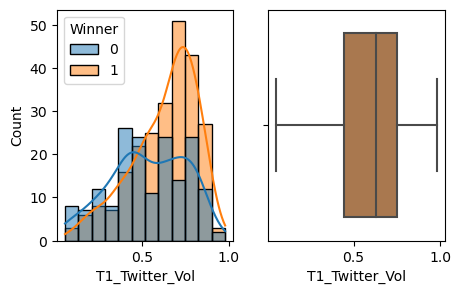

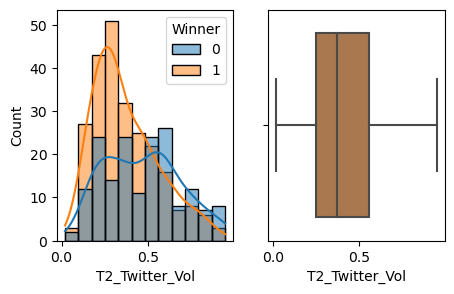

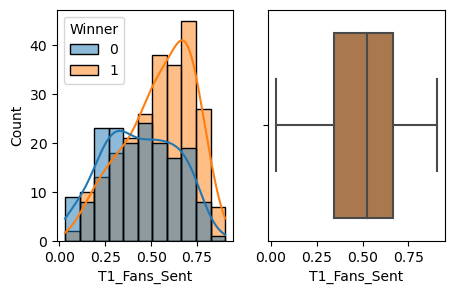

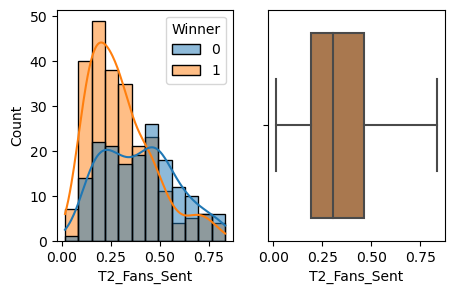

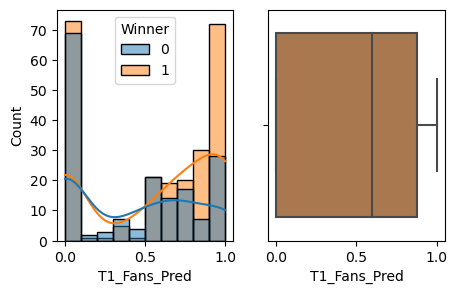

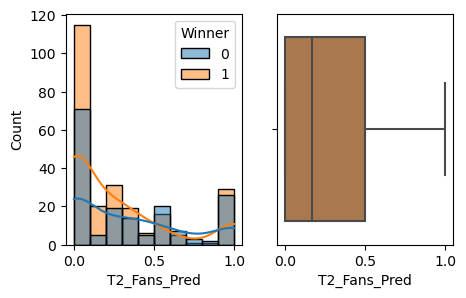

In [10]:
numerical = train.drop('Winner', axis=1).columns
for col in numerical:
    fig, ax = plt.subplots(1, 2, figsize=(5,3))
    sns.histplot(data=train, x=col, ax=ax[0],color='#B87740',  kde=True, hue='Winner')
    sns.boxplot(data=train, x=col, ax=ax[1],color='#B87740');

fig.savefig('outliers.png')

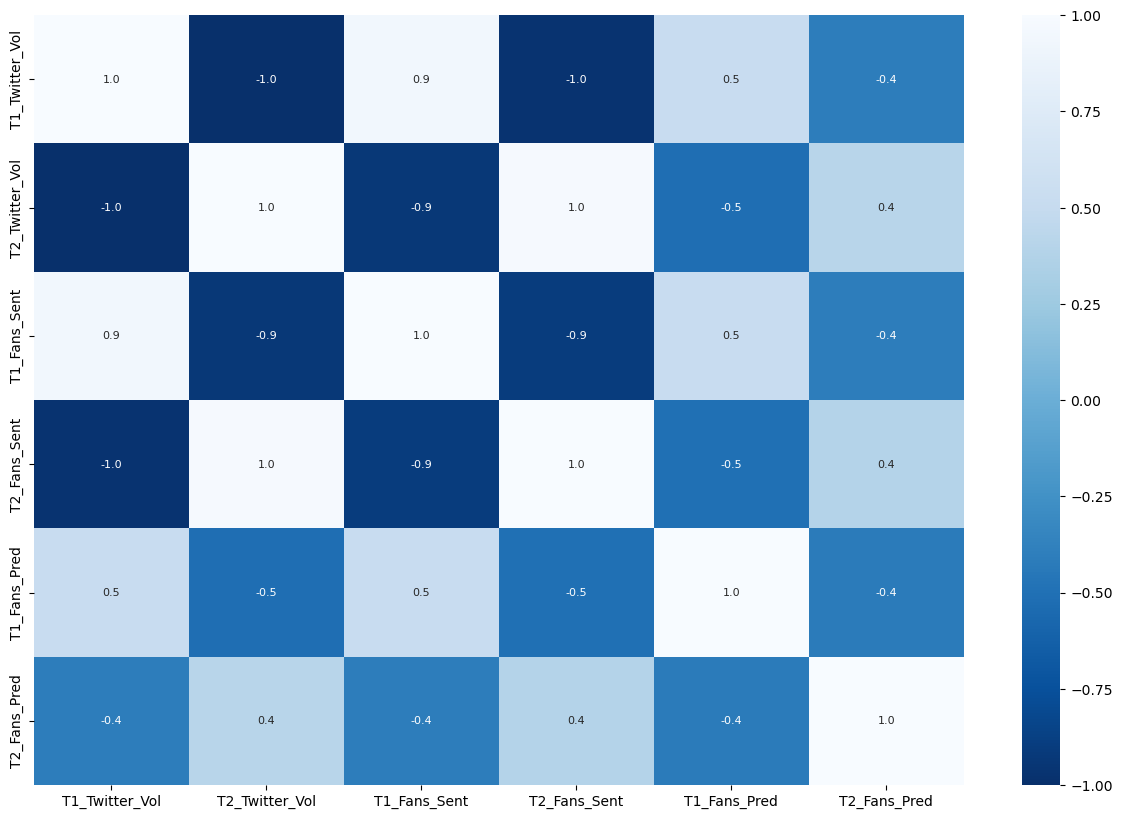

In [11]:
## correlation plot
# Correlation matrix - quantitative variables
plt.figure(figsize=(15,10))
sns.heatmap(train.drop(['Winner'], axis=1).corr(),cbar=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues_r')
plt.show()

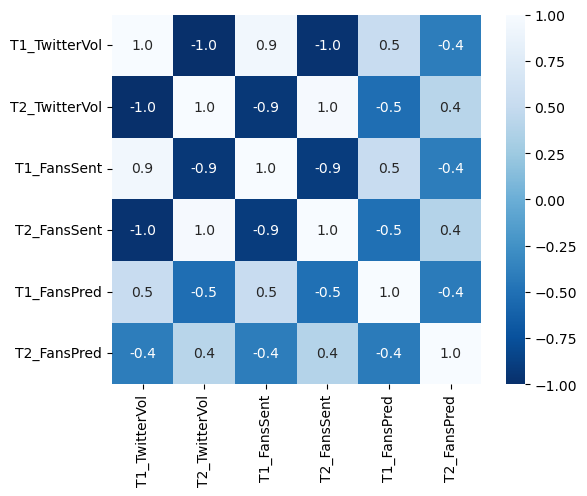

{'corr':                T1_TwitterVol  T2_TwitterVol  T1_FansSent  T2_FansSent  \
 T1_TwitterVol       1.000000      -1.000000     0.933431    -0.973184   
 T2_TwitterVol      -1.000000       1.000000    -0.933431     0.973184   
 T1_FansSent         0.933431      -0.933431     1.000000    -0.901778   
 T2_FansSent        -0.973184       0.973184    -0.901778     1.000000   
 T1_FansPred         0.519256      -0.519256     0.520173    -0.504099   
 T2_FansPred        -0.408191       0.408191    -0.409004     0.387070   
 
                T1_FansPred  T2_FansPred  
 T1_TwitterVol     0.519256    -0.408191  
 T2_TwitterVol    -0.519256     0.408191  
 T1_FansSent       0.520173    -0.409004  
 T2_FansSent      -0.504099     0.387070  
 T1_FansPred       1.000000    -0.421962  
 T2_FansPred      -0.421962     1.000000  ,
 'ax': <AxesSubplot:>}

In [20]:
# dython - all the variables
from dython.nominal import associations
associations(train.drop(['Winner'], axis=1), fmt='.1f', cmap='Blues_r')

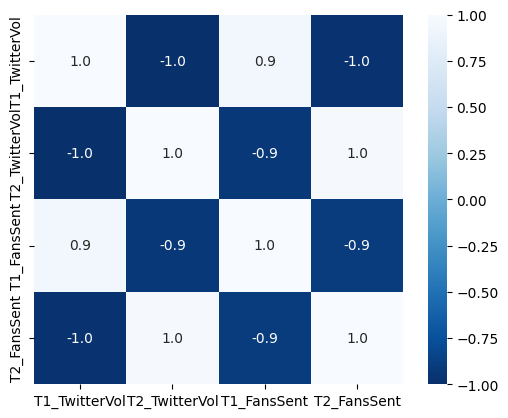

{'corr':                T1_TwitterVol  T2_TwitterVol  T1_FansSent  T2_FansSent
 T1_TwitterVol       1.000000      -1.000000     0.933431    -0.973184
 T2_TwitterVol      -1.000000       1.000000    -0.933431     0.973184
 T1_FansSent         0.933431      -0.933431     1.000000    -0.901778
 T2_FansSent        -0.973184       0.973184    -0.901778     1.000000,
 'ax': <Axes: >}

In [8]:
# dython
from dython.nominal import associations
associations(train.drop(['Winner', 'T1_FansPred', 'T2_FansPred'], axis=1), fmt='.1f', cmap='Blues_r')

In [25]:
pca = PCA()
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])

X = pipe.fit_transform(train.drop('Winner', axis=1))

pca = PCA(n_components=3)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=train['Winner'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

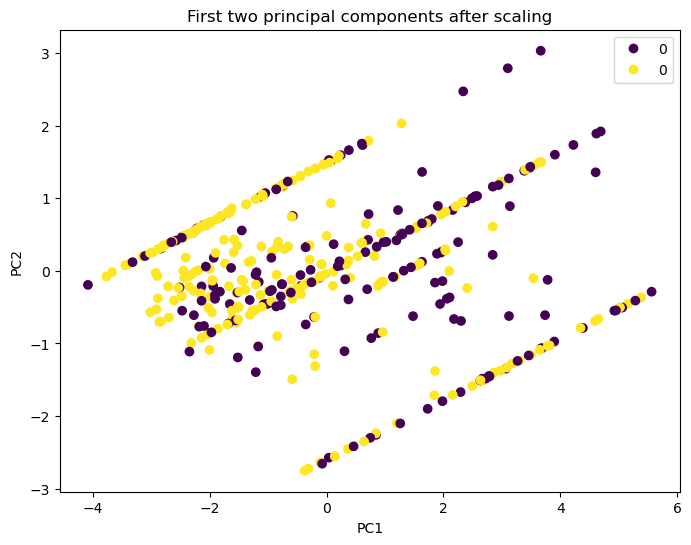

In [22]:
# Show first two principal components with scaler
pca = PCA()
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
plt.figure(figsize=(8,6))
Xt = pipe.fit_transform(train.drop('Winner', axis=1))
plot = plt.scatter(Xt[:,0], Xt[:,1], c=train['Winner'])
plt.legend(handles=plot.legend_elements()[0], labels=list(train['Winner']))
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("First two principal components after scaling")
plt.show()

In [23]:
pca.explained_variance_ratio_

array([7.37794496e-01, 1.45561525e-01, 9.32064761e-02, 1.81210072e-02,
       5.31649583e-03, 3.48706239e-33])

## FA

In [32]:
train_fa = train.drop([  'Winner', 'T2_FansPred', 'T1_FansPred'], axis=1)
train_fa.shape

(415, 4)

In [33]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(train_fa)
chi_square_value, p_value

(nan, nan)

In [34]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(train_fa)
kmo_model

0.6393411501120322

## Choosing the Number of Factors

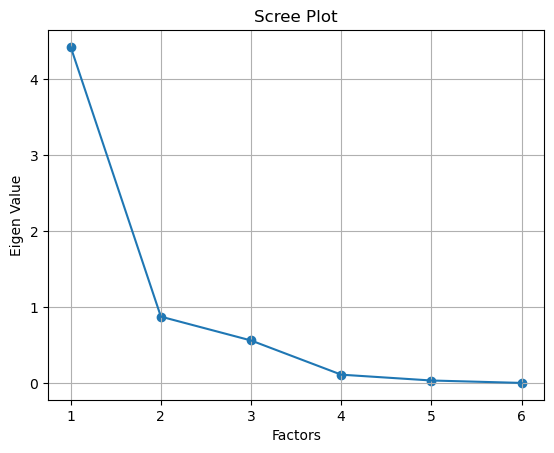

In [13]:
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(rotation = None,impute = "drop",n_factors=train_fa.shape[1])
fa.fit(train_fa)
ev,_ = fa.get_eigenvalues()
plt.scatter(range(1,train_fa.shape[1]+1),ev)
plt.plot(range(1,train_fa.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigen Value')
plt.grid()

In [14]:
ev

array([ 4.42676698e+00,  8.73369148e-01,  5.59238856e-01,  1.08726043e-01,
        3.18989750e-02, -1.44557587e-16])

In [15]:
fa = FactorAnalyzer(n_factors=2,rotation='varimax')
fa.fit(train_fa)
print(pd.DataFrame(fa.loadings_,index=train_fa.columns))

                      0         1
T1_TwitterVol  0.919895  0.390793
T2_TwitterVol -0.919895 -0.390793
T1_FansSent    0.830553  0.428964
T2_FansSent   -0.899667 -0.368794
T1_FansPred    0.291437  0.647255
T2_FansPred   -0.203928 -0.560081


In [16]:
print(pd.DataFrame(fa.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var']))

                         0         1
Variance          3.318153  1.358086
Proportional Var  0.553026  0.226348
Cumulative Var    0.553026  0.779373


In [17]:
print(pd.DataFrame(fa.get_communalities(),index=train_fa.columns,columns=['Communalities']))

               Communalities
T1_TwitterVol       0.998926
T2_TwitterVol       0.998926
T1_FansSent         0.873828
T2_FansSent         0.945409
T1_FansPred         0.503875
T2_FansPred         0.355277


In [1]:
# # find and remove correlated features
# def correlation(dataset, threshold):
#     col_corr = set()   
#     corr_matrix = dataset.corr()
#     for i in range(len(corr_matrix.columns)):
#         for j in range(i):
#             if abs(corr_matrix.iloc[i, j]) > threshold:  
#                 colname = corr_matrix.columns[i]   
#                 col_corr.add(colname)
#     return col_corr

# correlation(train.iloc[:,:-1],0.8)